<a href="https://colab.research.google.com/github/sanscurtodavis/drexel_research/blob/main/notes_11012024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import modules




In [56]:
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns
import numpy as np
import pandas as pd

## Data acquistion and preprocessing

In [57]:
start_date = "2024-01-01"
end_date = "2024-06-01"

# Define tickers for Nvidia, Amazon, Bitcoin, and Ethereum
tickers = ['NVDA', 'AMZN', 'BTC-USD', 'ETH-USD']
data = yf.download(tickers, start="2023-01-01", end="2024-01-01", interval="1d")['Close']

# Drop any NaN rows within the data
data = data.dropna()

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler()
data_normalized = pd.DataFrame(scaler.fit_transform(data), columns=data.columns, index=data.index)

[*********************100%***********************]  4 of 4 completed


## Noramlized stock and cryptocurrency data plotted against each other

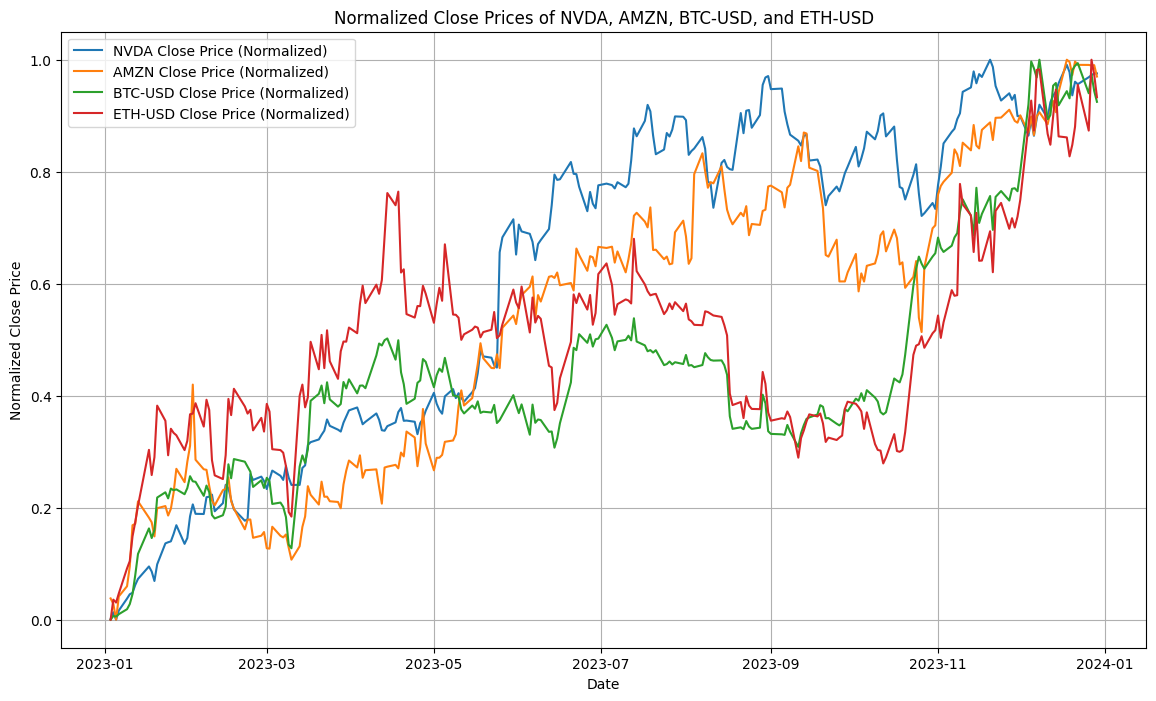

In [58]:
# Plot the normalized close prices
plt.figure(figsize=(14, 8))
for ticker in tickers:
    plt.plot(data_normalized[ticker], label=f'{ticker} Close Price (Normalized)')

plt.title('Normalized Close Prices of NVDA, AMZN, BTC-USD, and ETH-USD')
plt.xlabel('Date')
plt.ylabel('Normalized Close Price')
plt.legend()
plt.grid()
plt.show()

## Correlation matrix creation

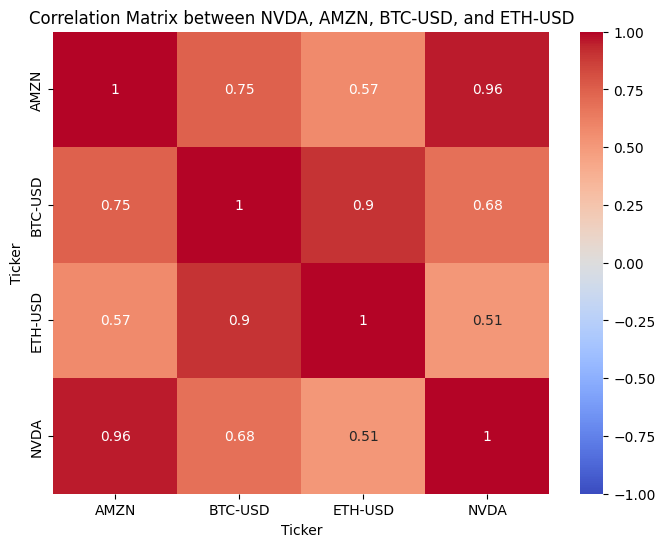

In [59]:
# Calculate the correlation matrix
correlation_matrix = data_normalized.corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix between NVDA, AMZN, BTC-USD, and ETH-USD")
plt.show()

## Machine learning component with Linear Regression

In [60]:
# Calculate daily returns
returns = data.pct_change().dropna()

# Separate features (BTC and ETH returns) and targets (NVDA and AMZN returns)
X = returns[['BTC-USD', 'ETH-USD']]
y_nvda = returns['NVDA']
y_amzn = returns['AMZN']

# Split the data into training and testing sets for NVDA
X_train_nvda, X_test_nvda, y_train_nvda, y_test_nvda = train_test_split(X, y_nvda, test_size=0.2, random_state=42)

# Train linear regression model for NVDA
model_nvda = LinearRegression()
model_nvda.fit(X_train_nvda, y_train_nvda)
y_pred_nvda = model_nvda.predict(X_test_nvda)

# Split the data into training and testing sets for AMZN
X_train_amzn, X_test_amzn, y_train_amzn, y_test_amzn = train_test_split(X, y_amzn, test_size=0.2, random_state=42)

# Train linear regression model for AMZN
model_amzn = LinearRegression()
model_amzn.fit(X_train_amzn, y_train_amzn)
y_pred_amzn = model_amzn.predict(X_test_amzn)

# Calculate R² scores
r2_nvda = r2_score(y_test_nvda, y_pred_nvda)
r2_amzn = r2_score(y_test_amzn, y_pred_amzn)

# Print results
print(f"R² Score for NVDA (Predicted from BTC and ETH): {r2_nvda:.2f}")
print(f"R² Score for AMZN (Predicted from BTC and ETH): {r2_amzn:.2f}")
print("Coefficients for NVDA Model:", model_nvda.coef_)
print("Coefficients for AMZN Model:", model_amzn.coef_)

R² Score for NVDA (Predicted from BTC and ETH): -0.04
R² Score for AMZN (Predicted from BTC and ETH): 0.03
Coefficients for NVDA Model: [-0.08483461  0.21698998]
Coefficients for AMZN Model: [ 0.10808718 -0.01368107]


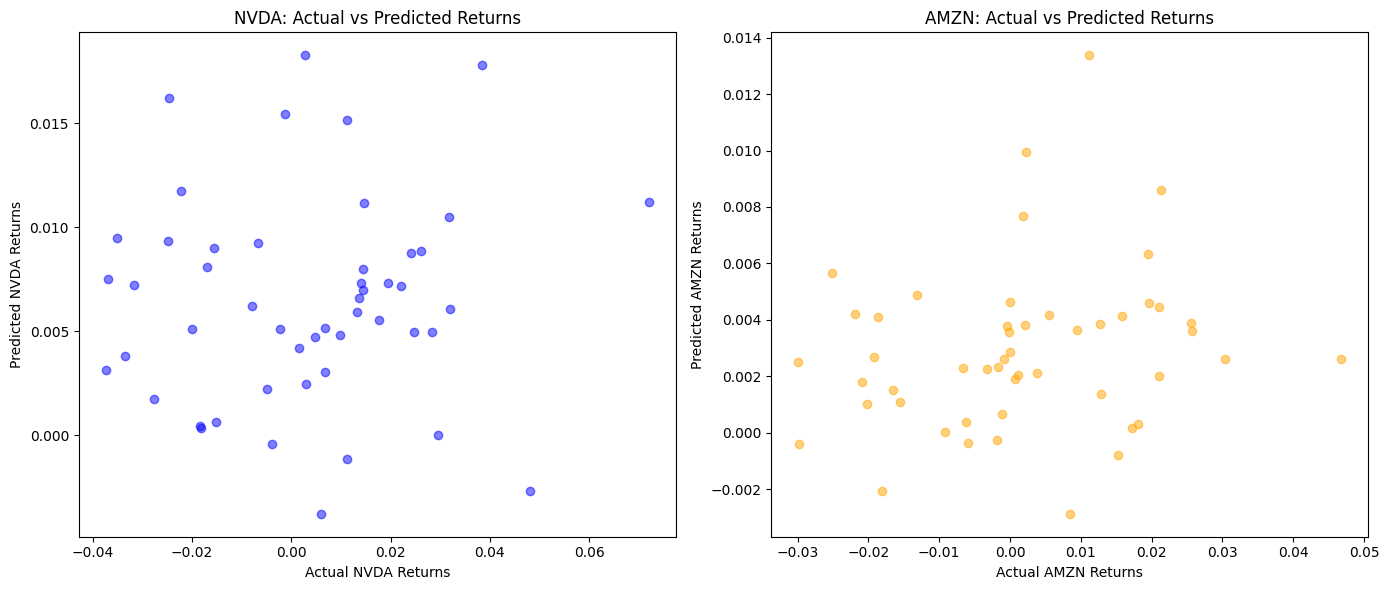

In [61]:
# Plot predicted vs actual returns for NVDA and AMZN
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test_nvda, y_pred_nvda, alpha=0.5, color="blue")
plt.xlabel("Actual NVDA Returns")
plt.ylabel("Predicted NVDA Returns")
plt.title("NVDA: Actual vs Predicted Returns")

plt.subplot(1, 2, 2)
plt.scatter(y_test_amzn, y_pred_amzn, alpha=0.5, color="orange")
plt.xlabel("Actual AMZN Returns")
plt.ylabel("Predicted AMZN Returns")
plt.title("AMZN: Actual vs Predicted Returns")

plt.tight_layout()
plt.show()